In [157]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
import pickle

In [2]:
#récupération des données mnist via tensorflow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#taille des donnéées
print(len(x_train),len(x_test))

60000 10000


In [4]:
#taille des images mnist 
print(np.shape(x_train[0]))

(28, 28)


In [5]:
28*28

784

# Visualisation

In [6]:
import matplotlib.pyplot as plt
import random

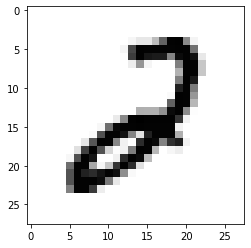

2


In [7]:
plt.imshow(x_train[457], cmap='Greys')
plt.show()
print(y_train[457])

In [8]:
#flat données
x_train_flat = []
for i in range (len(x_train)):
    x_train_flat.append(np.ndarray.flatten(x_train[i]))
    
x_test_flat = []
for i in range (len(x_test)):
    x_test_flat.append(np.ndarray.flatten(x_test[i]))

In [9]:
from sklearn.linear_model import LogisticRegression

In [103]:
clf = LogisticRegression(C=1, class_weight=None, dual=False, penalty='l1', solver='lbfgs').fit(x_train_flat[:5000], y_train[:5000])

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [71]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred_train = clf.predict(x_train_flat)
accuracy_score(y_train,y_pred_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [12]:
y_pred_test = clf.predict(x_test_flat)
accuracy_score(y_test,y_pred_test)

0.8715

In [13]:
def pass_warnings(*args, **kwargs):
    pass
import warnings
warnings.warn = pass_warnings

In [14]:
pd.Series(y_train[:5000]).value_counts()

1    563
7    550
4    535
6    501
9    495
3    493
2    488
0    479
8    462
5    434
dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


parametres = {'dual':[False,True], 'penalty' : ['l2','l1','elasticnet'],'C': [1 ,10,100],
              'class_weight':[None,'balanced'],
             'solver':['lbfgs','saga','liblinear']} 

grid = GridSearchCV(LogisticRegression(),
                    param_grid =parametres,
                    cv = StratifiedKFold(n_splits=3),
                    verbose=50)

grid.fit(x_train_flat[:5000], y_train[:5000])

print('\nBest R^2 Score : %.2f'%grid.best_score_, ' Best Params : ', str(grid.best_params_))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3; 1/108] START C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs
[CV 1/3; 1/108] END C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs; total time=   1.3s
[CV 2/3; 1/108] START C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs
[CV 2/3; 1/108] END C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs; total time=   1.3s
[CV 3/3; 1/108] START C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs
[CV 3/3; 1/108] END C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs; total time=   1.2s
[CV 1/3; 2/108] START C=1, class_weight=None, dual=False, penalty=l2, solver=saga
[CV 1/3; 2/108] END C=1, class_weight=None, dual=False, penalty=l2, solver=saga; total time=  28.6s
[CV 2/3; 2/108] START C=1, class_weight=None, dual=False, penalty=l2, solver=saga
[CV 2/3; 2/108] END C=1, class_weight=None, dual=False, penalty=l2, solver=saga; total time=  28.3s
[CV 3/3; 2/108] START

In [98]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_dual', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
df_res = pd.DataFrame(grid.cv_results_)[['mean_fit_time','split0_test_score', 'split1_test_score', 'split2_test_score','mean_test_score', 'std_test_score', 'rank_test_score']]

In [104]:
len(df_res.dropna())

36

In [132]:
sum(list(pd.DataFrame(grid.cv_results_)[[ 'mean_fit_time']]['mean_fit_time']*3))

1753.775712966919

In [134]:
1753.775712966919/60

29.229595216115317

In [31]:
pd.DataFrame(grid.cv_results_)[[ 'params', 'rank_test_score']]

,params,rank_test_score
0,"{'C': 1, 'class_weight': None, 'dual': False, ...",13
1,"{'C': 1, 'class_weight': None, 'dual': False, ...",11
2,"{'C': 1, 'class_weight': None, 'dual': False, ...",32
3,"{'C': 1, 'class_weight': None, 'dual': False, ...",84
4,"{'C': 1, 'class_weight': None, 'dual': False, ...",2
...,...,...
103,"{'C': 100, 'class_weight': 'balanced', 'dual':...",43
104,"{'C': 100, 'class_weight': 'balanced', 'dual':...",42
105,"{'C': 100, 'class_weight': 'balanced', 'dual':...",38
106,"{'C': 100, 'class_weight': 'balanced', 'dual':...",93


In [32]:
df_res.dropna().sort_values(by=['rank_test_score'])

,mean_fit_time,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
58,56.500331,0.884223,0.896221,0.891957,0.890800,0.004966,1
4,50.809997,0.882424,0.896821,0.892557,0.890600,0.006038,2
37,28.530666,0.881224,0.897421,0.892557,0.890400,0.006786,3
73,29.151666,0.880024,0.898020,0.891957,0.890000,0.007476,4
55,30.147333,0.882424,0.896221,0.891357,0.890000,0.005714,5
94,52.722665,0.881824,0.897421,0.890756,0.890000,0.006390,6
19,28.352662,0.881824,0.896221,0.891357,0.889800,0.005980,7
40,50.956999,0.880624,0.896221,0.891957,0.889600,0.006582,8
76,53.233329,0.880024,0.897421,0.891357,0.889600,0.007210,9
91,28.398334,0.881824,0.896221,0.890756,0.889600,0.005934,10


In [63]:
df = pd.DataFrame(grid.cv_results_)[[ 'params', 'rank_test_score']]
df[df['rank_test_score'] == 13]['params'].iloc[0]

{'C': 1,
 'class_weight': None,
 'dual': False,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [65]:
df[df['rank_test_score'] == 3]['params'].iloc[0]

{'C': 10,
 'class_weight': None,
 'dual': False,
 'penalty': 'l2',
 'solver': 'saga'}

In [70]:
grid.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'dual': False,
 'penalty': 'l1',
 'solver': 'saga'}

In [135]:
LogisticRegression(**df[df['rank_test_score'] == 13]['params'].iloc[0])

LogisticRegression(C=1)

In [88]:
from sklearn.metrics import f1_score

In [75]:
start_time = time.time()

clf13 = LogisticRegression(**df[df['rank_test_score'] == 13]['params'].iloc[0]).fit(x_train_flat, y_train)
timefit = time.time() - start_time
y_pred_train = clf13.predict(x_train_flat)
print(accuracy_score(y_train,y_pred_train))
print(timefit)

0.9339166666666666
22.396997213363647


In [91]:
y_pred_test = clf13.predict(x_test_flat)
accuracy_score(y_test,y_pred_test)

0.9255

In [143]:
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [138]:
f1_score(y_test,y_pred_test,average='macro')

0.9244351911243222

In [97]:
clf13.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [98]:
f1_score(y_test,y_pred_test, average=None,labels =clf13.classes_)

array([0.96832579, 0.9737303 , 0.91321499, 0.90513834, 0.93047035,
       0.88635066, 0.94643786, 0.92825769, 0.87955466, 0.91287129])

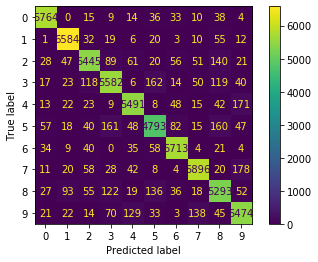

In [80]:
plot_confusion_matrix(clf13,x_train_flat, y_train)
plt.show()

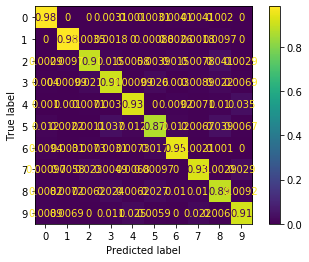

In [149]:
plot_confusion_matrix(clf13,x_test_flat, y_test, normalize='true')
plt.show()

[[9.82653061e-01 0.00000000e+00 0.00000000e+00 3.06122449e-03
  1.02040816e-03 3.06122449e-03 4.08163265e-03 4.08163265e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.79735683e-01 3.52422907e-03 1.76211454e-03
  0.00000000e+00 8.81057269e-04 2.64317181e-03 1.76211454e-03
  9.69162996e-03 0.00000000e+00]
 [2.90697674e-03 9.68992248e-03 8.97286822e-01 1.45348837e-02
  5.81395349e-03 3.87596899e-03 1.45348837e-02 7.75193798e-03
  4.06976744e-02 2.90697674e-03]
 [3.96039604e-03 9.90099010e-04 2.07920792e-02 9.06930693e-01
  9.90099010e-04 2.57425743e-02 2.97029703e-03 8.91089109e-03
  2.17821782e-02 6.93069307e-03]
 [1.01832994e-03 1.01832994e-03 7.12830957e-03 3.05498982e-03
  9.26680244e-01 0.00000000e+00 9.16496945e-03 7.12830957e-03
  1.01832994e-02 3.46232179e-02]
 [1.23318386e-02 2.24215247e-03 1.12107623e-03 3.69955157e-02
  1.23318386e-02 8.69955157e-01 1.23318386e-02 6.72645740e-03
  3.92376682e-02 6.72645740e-03]
 [9.39457203e-03 3.13152401e-03 7.30688935e-03 3.13152401e

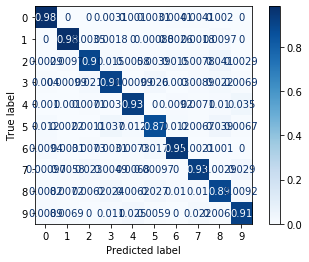

In [155]:
disp = plot_confusion_matrix(clf13, x_test_flat, y_test,
                             cmap=plt.cm.Blues,
                             normalize='true')



print(disp.confusion_matrix)
plt.show()

In [76]:
start_time = time.time()

clf3 = LogisticRegression(**df[df['rank_test_score'] == 3]['params'].iloc[0]).fit(x_train_flat, y_train)
timefit = time.time() - start_time
y_pred_train = clf3.predict(x_train_flat)
print(accuracy_score(y_train,y_pred_train))
print(timefit)
#94 de plus sur 20 000

0.9386
584.0550043582916


In [139]:
y_pred_test = clf3.predict(x_test_flat)
accuracy_score(y_test,y_pred_test)

0.9255

In [140]:
f1_score(y_test,y_pred_test,average='macro')

0.9243390962504388

In [77]:
start_time = time.time()

clf1 = LogisticRegression(**grid.best_params_).fit(x_train_flat, y_train)
timefit = time.time() - start_time
y_pred_train = clf1.predict(x_train_flat)
print(accuracy_score(y_train,y_pred_train))
print(timefit)

0.9383833333333333
1077.5700941085815


In [141]:
y_pred_test = clf1.predict(x_test_flat)
accuracy_score(y_test,y_pred_test)

0.9254

In [156]:
f1_score(y_test,y_pred_test,average='macro')

0.9242743799627299

In [87]:
# Model convolutionnel Keras

In [162]:
clf13.predict(x_test_flat[0].reshape(1, -1))[0]

7

In [158]:
#enregistrement du model
#pickle.dump(clf13, open('model_log.pkl','wb'))